<a href="https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch4_1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Tensorflow 2.0 Tutorial ch4.1 - 선형회귀"
date: 2020-04-14T22:40:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "선형회귀"
  - "Linear Regression"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 
- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 
![](/img/tensorflow2.0/book.jpg)<!-- -->

- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)


## I. 기본개념
선형 회귀(Linear Regression)는 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것입니다. 선형 회귀에서 주로 사용되는 2차원에서의 직선이란 기울기와 y절편을 가지는 좌표평면 위 점들의 집합니다. 

선형 회귀를 이용하면 수치형 데이터의 경향성을 예측할 수 있습니다. 

2018년 우리나라의 지역별 인구증가율과 고령인구비율 데이터를 가지고 인구증가율과 고령인구비율 사이에 어떤 경향성이 있는지 선형 회귀로 예측해봅니다.[^1]

[^1]: 통계청, e-지방지표 중 인구 부분 (http://kosis.kr/visual/eRegionJipyo/themaJipyo/eRegionJipyoThemaJipyoView.do)

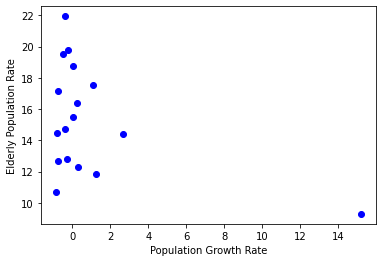

In [1]:
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

오른쪽 아래에 치우친 하나의 점이 눈에 띄는데, 이것은 극단치(outlier)라고 부르며 일반적인 경향에서 벗어난 사례입니다. 이 극단치는 세종시 데이터인데, 행정수도 이전으로 공무원 등 젊은 인구가 많이 이주해오면서 인구증가율은 높고, 고령인구비율은 낮은 데이터가 만들어진 것 같습니다. 

이러한 극단치는 제거하는 것이 일반적인 경향을 파악하기 위해서는 좋습니다. 

극단치를 제거하는 코드는 아래와 같습니다. 

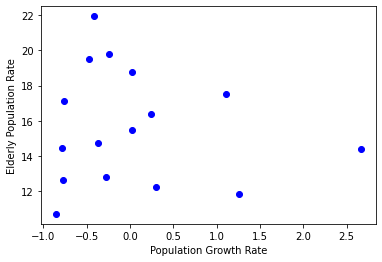

In [4]:
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

## II. 회귀 공식 이해

이제 선형 회귀선을 그려봅니다. 데이터의 경향성을 가장 잘 설명하는 하나의 직선과 각 데이터의 차이를 잔차(`residual`)라고 합니다. 이런 잔차의 제곱을 최소화하는 알고리즘을 최소제곱법(`Least Square Method`)라고 부릅니다. 

최소제곱법으로 직선 $y = ax + b$의 a(기울기)와 b(y절편)을 구할 수 있습니다. 중간의 유도과정을 생략하면 공식은 아래와 `a`, `b`는 아래와 같습니다. 

$$a = \frac{\sum_{i=1}^{n}\left (y_{i} - \bar{y} \right )\times\left (1 \right )}{\sum_{i=1}^{n}\left (x_{i} - \bar{x}\right )^{2}}$$

$$b = \bar{y} - a\bar{x}$$

여기서, $x_{i}$, $y_{i}$는 각 데이터 값이고, $\bar{x}$, $\bar{y}$는 데이터의 평균을 의미합니다. 다음 코드는 최소제곱법으로 `a`와 `b`를 직접 계산해서 회귀선을 구합니다. 



### (1) 코드 실습

이제 코드 실습을 진행해봅니다. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다. 
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다. 
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar

print('a:', a , 'b:', b)

a: -0.355834147915461 b: 15.669317743971302


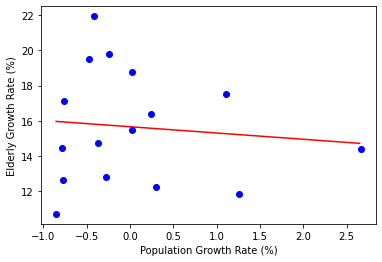

In [21]:
# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다. 
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x, line_y, 'r-')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Growth Rate (%)')

plt.show()

### (2) 코드 설명
```python
# X, Y의 평균을 구합니다. 
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다. 
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
```

- 리스트의 총합을 `sum()`으로 구하고 리스트의 원소 개수를 `len()`으로 구한 다음 평균을 구합니다. 
- 최소제곱법으로 `a`, `b`를 구하는 부분에서 두 개 이상의 리스트를 하나로 묶는 `list(zip(list_1, list_2)` 기법을 사용했습니다. 
- 참고로 `/=`는 복합 대입 연산자로써, `a = a / sum([(x - x_bar) ** 2 for x in X])` 을 의미합니다. 

추가적으로, `zip`에 대한 추가적인 이해를 돕기 위해 아래 소스코드를 실행하기를 바랍니다. 

In [23]:
numbers = [1, 2, 3]
letters = ['a', 'b', 'c']
zipped = zip(numbers, letters)
zipped

In [24]:
list(zipped)

[(1, 'a'), (2, 'b'), (3, 'c')]

그래프를 그리기 위한 회귀선 `x`, `y` 데이터는 아래와 같습니다. 

```python
# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다. 
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b
```

이렇게 구한 회귀선에서 데이터의 경향을 알 수 있습니다. X값이 증가할수록 Y값은 감소합니다. 이러한 관계를 `음의 상관관계에 있다고 합니다.`

## III. 텐서플로를 활용한 회귀선 구하기

수식을 적용하지 않고 텐서플로를 구해봅니다.

99 a: 0.122943394 b: 6.6775966 loss: 90.444305
199 a: -0.115708604 b: 11.171787 loss: 29.961662
299 a: -0.25565353 b: 13.792711 loss: 13.294286
399 a: -0.32145542 b: 15.025314 loss: 10.194582
499 a: -0.34617883 b: 15.488448 loss: 9.813442
599 a: -0.35362422 b: 15.627921 loss: 9.782514
699 a: -0.35542518 b: 15.661658 loss: 9.780862
799 a: -0.35577333 b: 15.668183 loss: 9.780805
899 a: -0.35582697 b: 15.669186 loss: 9.780804
999 a: -0.35583326 b: 15.669302 loss: 9.780804


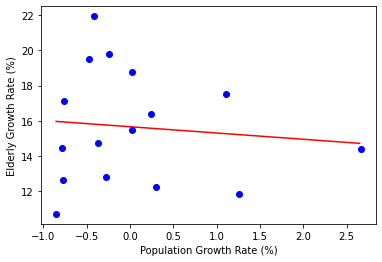

In [27]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다. 

def compute_loss(): 
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)

for i in range(1000): 
  # 잔차의 제곱의 평균을 최소화(minimize) 합니다. 
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다. 
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Growth Rate (%)')
plt.show()

기대출력인 `Y`에서 실제출력인 `y_pred`를 빼는데, 이를 잔차라고 부릅니다. 이 잔차의 제곱을 모두 더해서 평균을 낸 값을 `loss`로 반환합니다.[^2]

[^2]: 왜 제곱할까요? 잔차를 이해한다면 어려운 것은 아닙니다만 잔차의 경우 음수와 양수 모두가 나올 수 있는데, 이를 모두 더하면 0이 됩니다. 따라서, 절대값을 취하거나 제곱해서 더한후 제곱근을 취하는 방법을 사용합니다. 

```python
optimizer = tf.optimizers.Adam(lr=0.07)
```

`optimizer` (최적화 함수)는 미분 계산 및, 가중치 업데이트를 자동으로 진행해주는 편리한 도구입니다. 

이 부분에 대한 설명은 교재를 참조하시기를 바랍니다. `Adam Optimizer`의 학습률은 보통 0.1 ~ 0.0001 사이의 값을 사용합니다. 

학습률을 정하는 방법은 하이퍼파라미터 기법으로 많이 사용되는데, 머신러닝 강의를 기억하시는 분은 `Grid Search Vs. Random Search`에 차이점에 대해 대략적으로 배웠을 겁니다. 그 부분을 기억하시기를 바랍니다. 

```python
for i in range(1000): 
  # 잔차의 제곱의 평균을 최소화(minimize) 합니다. 
  optimizer.minimize(compute_loss, var_list=[a,b])
```

1000번의 학습을 거쳐 `a`와 `b`는 잔차의 제곱의 평균을 최소화하는 적절한 값에 도달합니다. 

## VI. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch4_1_linear_regression.ipynb) 

## V. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.